In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys

if './SelfCalGroupFinder/py/' not in sys.path:
    sys.path.append('./SelfCalGroupFinder/py/')
from pyutils import *
import plotting as pp
from dataloc import *
from bgs_helpers import *
import catalog_definitions as cat
from groupcatalog import *

%load_ext autoreload
%autoreload 2
%matplotlib inline

# Make plots high definition
plt.rcParams['figure.dpi'] = pp.DPI_PAPER

def savefig(filename, **kwargs):
    """Save the current figure as a PNG file and close it."""
    path = os.path.join(PAPER_PLOT_FOLDER, f'{filename}.png')
    plt.savefig(path, bbox_inches='tight', **kwargs)

In [2]:
gc = deserialize(cat.bgs_y1_pzp_2_6_c2)
df = gc.all_data
#gc.sanity_tests()

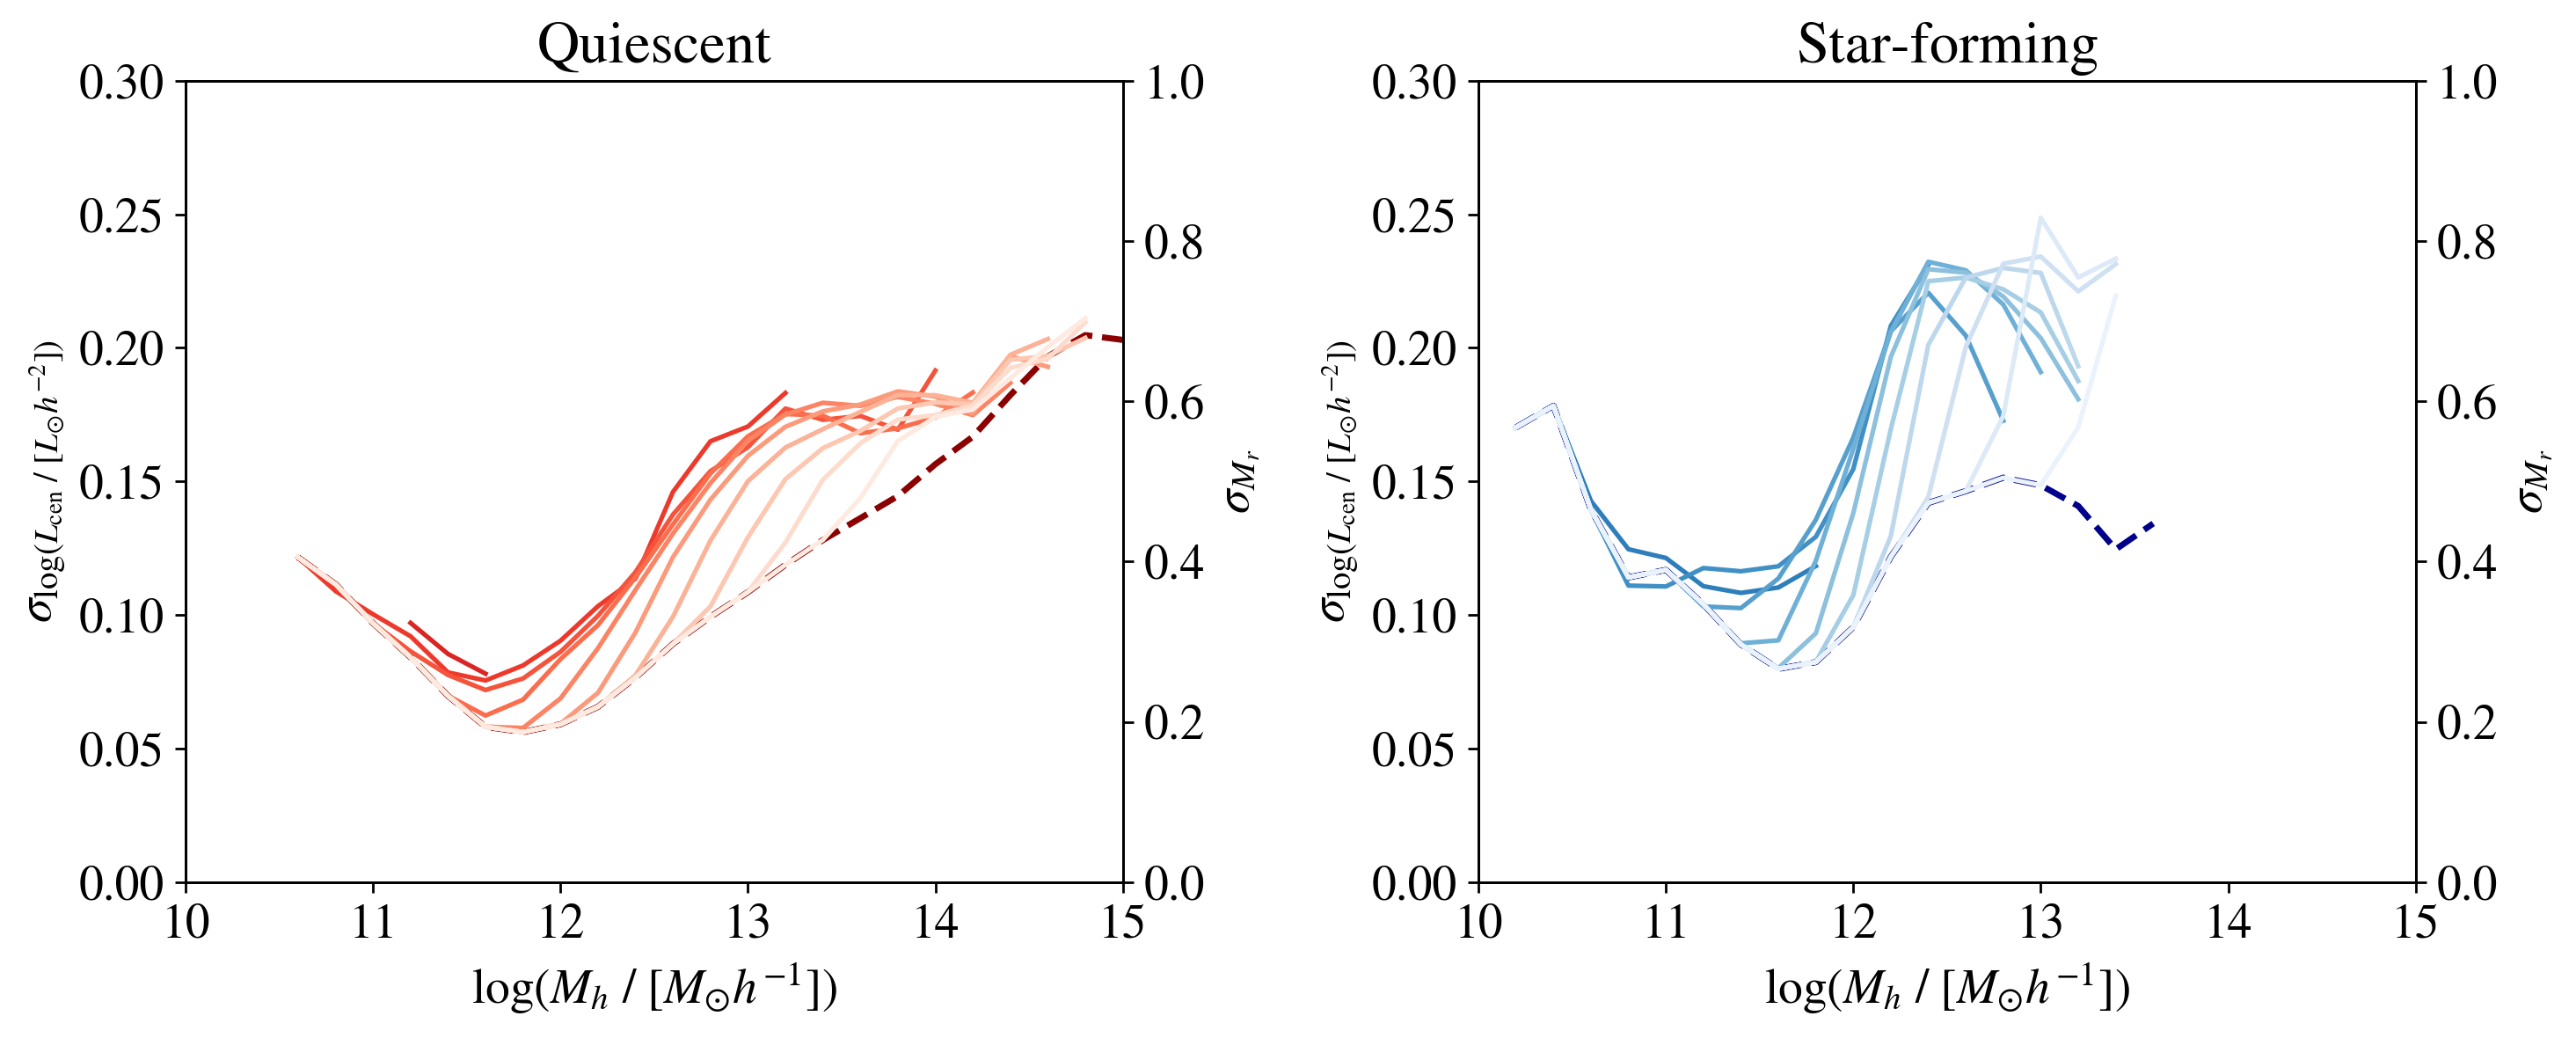

In [ ]:
# TODO VMAX WEIGHTING Modify here to be capped at max volume of each z threshold 
pp.LHMR_scatter_zcuts(gc, z_bins=None) 
plt.show()

In [ ]:
# Identify satellite galaxies
sats = gc.sats

# Find the index of the brightest satellite in each group
# A galaxy is brightest if it has the maximum luminosity (L_GAL)
brightest_sat_indices = sats.loc[sats.groupby('IGRP')['L_GAL'].idxmax()].index

# Add the 'IS_SBG' column, initializing to False
df['IS_SBG'] = False

# Set 'IS_SBG' to True for the brightest satellites
df.loc[brightest_sat_indices, 'IS_SBG'] = True

# Verify by checking a few groups with multiple satellites
multi_sat_groups = df[df['IS_SAT']].groupby('IGRP').filter(lambda x: len(x) > 1)

# Add centrals back
centrals = gc.centrals
centrals['IS_SBG'] = False
ofinterest = pd.concat([multi_sat_groups, centrals], ignore_index=True)

In [ ]:
# Get the first 5 unique group IDs from multi_sat_groups
first_5_groups = ofinterest['IGRP'].unique()[:10]

# Filter the DataFrame to include only these 5 groups
display_groups = ofinterest[ofinterest['IGRP'].isin(first_5_groups)]

# Sort by group ID and luminosity descending
display_groups = display_groups.sort_values(by=['IGRP', 'L_GAL'], ascending=[True, False]).reset_index(drop=True)

# Display the relevant columns for these groups
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(display_groups[['IGRP', 'L_GAL', 'IS_SAT', 'IS_SBG', 'Z_ASSIGNED_FLAG']])

In [ ]:
gc.postprocess()
gc.bootstrap_statistics()
gc.dump()

In [ ]:
gc.fit_hod_thresholds_to_model_for_display()
gc.dump()

In [ ]:
#gc.fit_hod_bins_to_model_for_display() #NameError: name 'unweighted_counts' is not defined
#gc.dump()

In [ ]:
# Broken attempt to reproduce what HOD from C++ does
#hods = tabulate_hod_by_luminosity(gc)
#pp.hod_bins_plot(gc, hods, model=False)
#plt.show()

In [ ]:
pp.hod_thresholds_plot(gc, 'r')
savefig('hod thresh fit red y1')
plt.show()

In [ ]:
pp.hod_thresholds_plot(gc, 'b')
savefig('hod thresh fit blue y1')
plt.show()

In [ ]:
pp.hod_thresholds_plot(gc, 'k')
savefig('hod thresh fit all y1')
plt.show()

In [ ]:
pp.hodt_satparams_evolution(gc, ['r', 'b', 'k'])
plt.show()

In [ ]:
pp.hodt_satparams_evolution_2(gc, ['r', 'b', 'k'])
savefig('hod sat params evolution y1')
plt.show()

In [ ]:
"""
all_match = True
for lbin in np.arange(len(hods.mag_bin_centers)):
    comparisons = {
        "Quiescent Centrals": (hods.central_q[lbin, :], hods_from_cpp.central_q[lbin, :]),
        "Quiescent Satellites": (hods.satellite_q[lbin, :], hods_from_cpp.satellite_q[lbin, :]),
        "Star-forming Centrals": (hods.central_sf[lbin, :], hods_from_cpp.central_sf[lbin, :]),
        "Star-forming Satellites": (hods.satellite_sf[lbin, :], hods_from_cpp.satellite_sf[lbin, :]),
        "All Centrals": (hods.central_all[lbin, :], hods_from_cpp.central_all[lbin, :]),
        "All Satellites": (hods.satellite_all[lbin, :], hods_from_cpp.satellite_all[lbin, :]),
        "Unweighted Halo Counts": (hods.unweighted_counts[:, lbin], hods_from_cpp.unweighted_counts[:, lbin])
    }

    for name, (py_hod, cpp_hod) in comparisons.items():
        if not np.allclose(py_hod, cpp_hod, equal_nan=True):
            all_match = False
            print(f"\n--- Mismatch found for {name} in lbin {lbin} ---")
            diff = py_hod - cpp_hod
            # Create a DataFrame to show a clean comparison
            comparison_df = pd.DataFrame({
                'logM_bin': hods.logM_bin_centers,
                'py_hod_log': py_hod,
                'cpp_hod_log': cpp_hod,
                'difference': diff
            })
            # Display only the rows where there is a non-zero difference
            print(comparison_df[~np.isclose(diff, 0)])


if all_match:
    print("✅ HOD tabulation verification successful: Python function matches C++ output.")
"""

In [ ]:
pp.proj_clustering_plot(gc)
savefig('wp fit y1')
plt.show()

In [ ]:
pp.lsat_data_compare_werr_plot(gc)
savefig('lsatratio fit y1')
plt.show()

In [ ]:
cat.sdss_published.postprocess()
sdss = cat.sdss_published
#sdss=deserialize(cat.sdss_colors_chi_v2)
#sdss.postprocess()
#sdss.bootstrap_statistics()
#sdss.dump()
# SDSS LHMR Inset is not matching the SDSS paper for blue...

In [ ]:
pp.LHMR_savederr(gc, inset=sdss)  
savefig('lhmr y1')   
plt.show() 

In [ ]:
pp.LHMR_scatter_savederr(gc)
savefig('lhmr scatter y1') 
plt.show()
# 0+

In [ ]:
pp.LHMR_scatter_nsat(gc)
plt.show()

In [ ]:
pp.SHMR_likereview(gc)
savefig('shmr likereview y1', transparent=True)
plt.show()

In [ ]:
pp.SHMR_savederr(gc, inset=sdss)  
savefig('shmr y1')   
plt.show()

In [ ]:
pp.SHMR_scatter_savederr(gc)  
savefig('shmr scatter y1') 
plt.show()

In [ ]:
pp.SHMR_scatter_litcompare(gc)  
savefig('shmr all scatter y1 litcompare') 
plt.show()

In [ ]:
pp.shmr_scatterplot(gc, selection=gc.centrals.loc[z_flag_is_spectro_z(gc.centrals['Z_ASSIGNED_FLAG'])])
plt.show()
pp.shmr_scatterplot(gc, selection=gc.centrals.loc[z_flag_is_not_spectro_z(gc.centrals['Z_ASSIGNED_FLAG'])])
plt.show()

In [ ]:
pp.fsat_with_err_from_saved(gc)
savefig('fsat y1')
plt.show()

In [ ]:
pp.quiescent_classification_dbl_plot(gc, sdss)
savefig('quiescent_classification')
plt.show()

In [ ]:
pp.hod_bins_plot(gc, gc.hodfit)
savefig('hod y1')
plt.show()

In [ ]:
pp.hod_bins_plot_like_zehavi(gc, gc.hodfit)
plt.show()

In [ ]:
fig1, fig2 = pp.hod_bins_plot(gc, gc.hod, model=True, seperate=True)
plt.figure(fig1.number)
savefig('hod red fit y1')
plt.figure(fig2.number)
savefig('hod blue fit y1')
plt.show()

In [ ]:
mcmc = deserialize(cat.bgs_y1_hybrid8_v1_mcmc)
chains, logprob = combine_emcee_backends(mcmc.get_backends()[0])
dims = chains.shape[2]
chains_flat = chains.reshape(-1, dims)
pp.gfparams_plots(gc, chains_flat)
savefig('gfparams mcmc y1')
plt.show()

In [ ]:
# Prep for Fiber Incompleteness Appendix Plots
sets = [deserialize(cat.bgs_y3_like_sv3_nn_c2), deserialize(cat.bgs_y3_like_sv3_pz_2_0_c2), deserialize(cat.bgs_y3_like_sv3_pz_2_6_c2)]
truth_catalog = deserialize(cat.bgs_sv3_pz_2_6_10p_c2) 
truth_catalog.name = "~Truth"
for s in sets:
    print(s.name)
    s.postprocess()
    s.get_true_z_from(truth_catalog.all_data)
    s.refresh_df_views()
sets[0].name = 'Nearest Neighbor'
sets[1].name = 'Photo-z'
sets[2].name = 'Hybrid Nearest Neighbor'

In [ ]:
pp.SHMR_scatter_lostgalstudy((*sets, truth_catalog))
plt.show()

In [ ]:
pp.test_purity_and_completeness(*sets, truth_catalog=truth_catalog, lost_only=False)
pp.purity_complete_plots(*sets, ymin=0.0)
savefig('purity_completeness_y1') 
plt.show()

In [ ]:
pp.lostgal_lum_func_paper_compare(*sets)
savefig('lost gal lum func')
plt.show()

In [ ]:
sets[0].name = 'NN'
sets[1].name = 'Photo-z'
sets[2].name = 'HNN'
pp.correct_redshifts_assigned_plot(*sets)
savefig('lost gals correct') 
plt.show()

## Error Analysis

In [ ]:
# Let's compare the std to the middle 68% confidence interval
fsat_arr, fsatr_arr, fsatb_arr = np.load(FSAT_VALUES_FROM_LOGS)
fsatr_std = np.std(fsatr_arr, axis=0)
fsatb_std = np.std(fsatb_arr, axis=0)
fsatr_ci_low = np.percentile(fsatr_arr, 16, axis=0)
fsatr_ci_high = np.percentile(fsatr_arr, 84, axis=0)
fsatb_ci_low = np.percentile(fsatb_arr, 16, axis=0)
fsatb_ci_high = np.percentile(fsatb_arr, 84, axis=0)

plt.figure(figsize=(8,6))
plt.plot(L_gal_labels, fsatr_std, label='Q Std', color='red', marker='o')
plt.plot(L_gal_labels, fsatb_std, label='SF Std', color='blue', marker='o')
plt.plot(L_gal_labels, (fsatr_ci_high - fsatr_ci_low)/2, label='Q 68% CI', color='orange', marker='x')
plt.plot(L_gal_labels, (fsatb_ci_high - fsatb_ci_low)/2, label='SF 68% CI', color='cyan', marker='x')
plt.xscale('log')
plt.yscale('log')
plt.ylabel('fsat')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# fsat - Compare bootstrapped statistical error to saved systematic error
q_stat_sys_ratio = gc.fsat_q_bootstrap_err / pp.fsat_variance_from_saved()[1]
sf_stat_sys_ratio = gc.fsat_sf_bootstrap_err / pp.fsat_variance_from_saved()[2]
plt.figure()
plt.plot(LogLgal_labels, q_stat_sys_ratio, 'r.-', label='Quiescent')
plt.plot(LogLgal_labels, sf_stat_sys_ratio, 'b.-', label='Star-forming')
plt.yscale('log')
plt.hlines(1, *plt.xlim(), color='k', linestyle='--')
plt.xlabel('log$(L_{\mathrm{gal}}~/~[L_{\odot}~/h^2])$')
plt.ylabel('Bootstrap Error / Systematic Error')
plt.title('fsat Bootstrap vs Systematic Error')
plt.twiny()
plt.xlim(log_solar_L_to_abs_mag_r(LogLgal_labels[0]), log_solar_L_to_abs_mag_r(LogLgal_labels[-1]))
plt.xticks(np.arange(-25, -12, 2))
plt.xlabel("$M_r$ - 5log(h)")
plt.legend()
plt.show()

In [ ]:
# LHMR - Compare bootstrapped statistical error to saved systematic error
q_stat_sys_ratio = gc.lhmr_q_bootstrap_err / pp.lhmr_variance_from_saved()[1]
sf_stat_sys_ratio = gc.lhmr_sf_bootstrap_err / pp.lhmr_variance_from_saved()[5]
plt.figure()
plt.plot(np.log10(Mhalo_labels), q_stat_sys_ratio, 'r.-', label='Quiescent')
plt.plot(np.log10(Mhalo_labels), sf_stat_sys_ratio, 'b.-', label='Star-forming')
plt.yscale('log')
plt.hlines(1, *plt.xlim(), color='k', linestyle='--')
plt.xlabel('log$(M_h~/~[M_\\odot /h]$)')
plt.ylabel('Bootstrap / Systematic')
plt.title('LHMR Bootstrap vs Systematic Error')
plt.legend()
plt.grid(True)
plt.show()

# TODO BUG? This lhmr_sf_bootstrap_err jumps up and down crazily for Mhalo ~ 10^12 to 10^13. Why?

In [ ]:
plt.plot(np.log10(Mhalo_labels), gc.lhmr_sf_bootstrap_err, 'b-', label='SF Bootstrap')
plt.plot(np.log10(Mhalo_labels), pp.lhmr_variance_from_saved()[5], 'b--', label='SF Systematic')
plt.plot(np.log10(Mhalo_labels), gc.lhmr_q_bootstrap_err, 'r-', label='Q Bootstrap')
plt.plot(np.log10(Mhalo_labels), pp.lhmr_variance_from_saved()[1], 'r--', label='Q Systematic')
plt.yscale('log')
plt.xlabel('log$(M_h~/~[M_\\odot /h]$)')
plt.ylabel('Error')
plt.title('LHMR Bootstrap vs Systematic Error')
plt.grid(True)
plt.legend()

# if outliers contains the Mh_bin, highlight that here
for o in outliers:
    plt.axvline(np.log10(o['Mh_bin']), color='gray', linestyle='-', alpha=0.5)

plt.show()

In [ ]:
# LHMR - Compare bootstrapped statistical error to saved systematic error
q_stat_sys_ratio = gc.lhmr_q_scatter_bootstrap_err / pp.lhmr_variance_from_saved()[3]
sf_stat_sys_ratio = gc.lhmr_sf_scatter_bootstrap_err / pp.lhmr_variance_from_saved()[7]
plt.figure()
plt.plot(np.log10(Mhalo_labels), q_stat_sys_ratio, 'r.-', label='Quiescent')
plt.plot(np.log10(Mhalo_labels), sf_stat_sys_ratio, 'b.-', label='Star-forming')
plt.yscale('log')
plt.hlines(1, *plt.xlim(), color='k', linestyle='--')
plt.xlabel('log$(M_h~/~[M_\\odot /h]$)')
plt.ylabel('Bootstrap / Systematic')
plt.title('LHMR Scatter Bootstrap vs Sys Error')
plt.legend()
plt.show()

# TODO BUG? This lhmr_sf_bootstrap_err jumps up and down crazily for Mhalo ~  10^13 due to outliers that survived our cuts

In [ ]:
plt.figure()
plt.plot(np.log10(Mhalo_labels), gc.lhmr_sf_scatter_bootstrap_err, 'b-', label='SF Bootstrap')
plt.plot(np.log10(Mhalo_labels), pp.lhmr_variance_from_saved()[7], 'b--', label='SF Systematic')
plt.plot(np.log10(Mhalo_labels), gc.lhmr_q_scatter_bootstrap_err, 'r-', label='Q Bootstrap')
plt.plot(np.log10(Mhalo_labels), pp.lhmr_variance_from_saved()[3], 'r--', label='Q Systematic')
plt.yscale('log')
plt.xlabel('log$(M_h~/~[M_\\odot /h]$)')
plt.ylabel('Error')
plt.title('LHMR Scatter Bootstrap vs Sys Err')
plt.ylim(1e-3, 1)
plt.legend()
plt.show()